In [78]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [79]:
df = pd.read_csv('pollutant-standards-index-jogja-2020.csv')
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


In [80]:
df.isnull().sum()

Date                  0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [81]:
df1 = df.drop(["Critical Component","Category","Date"], axis = 1)
df1.head()


,PM10,SO2,CO,O3,NO2,Max
0,30,2,69,19,0,69
1,16,2,58,33,0,58
2,12,2,46,18,0,46
3,8,2,84,29,0,84
4,8,3,50,0,0,50


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

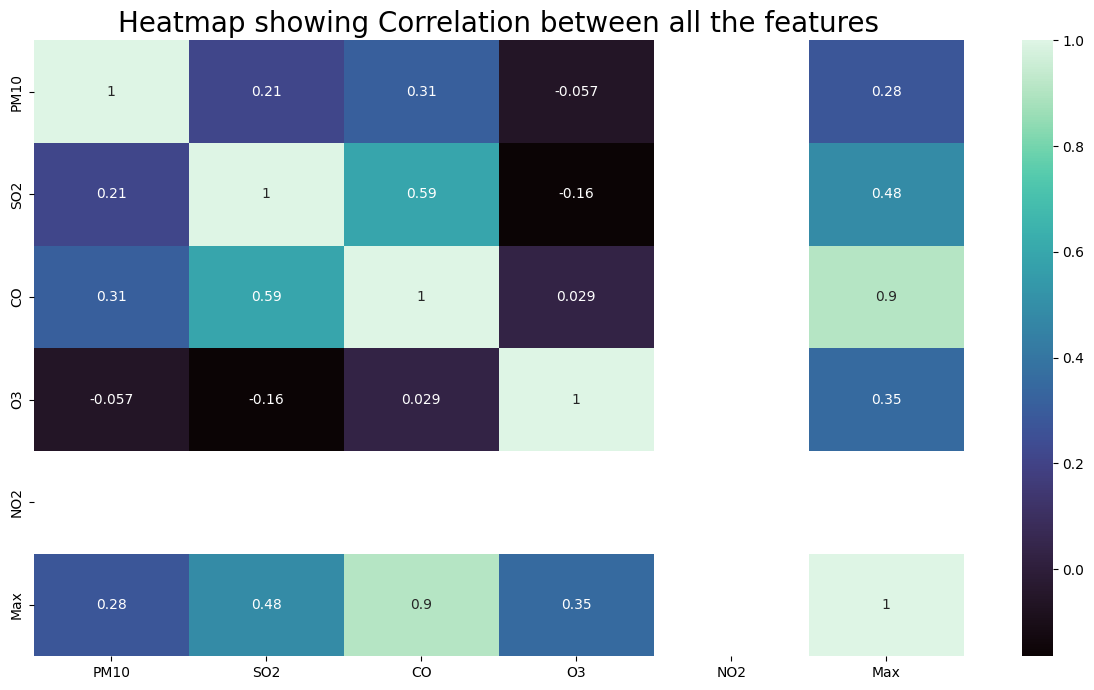

In [82]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')

In [83]:
zero_class = df1[df1.O3==0]
zero_class.shape

(61, 6)

In [84]:
one_class = df1[df1.O3==1]
one_class.shape

(2, 6)

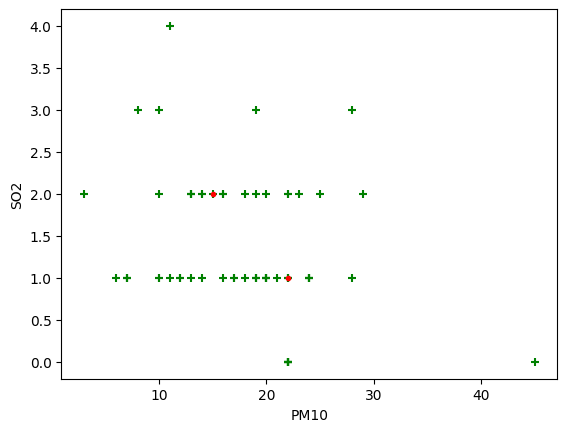

In [85]:
plt.xlabel('PM10')
plt.ylabel('SO2')
plt.scatter(zero_class['PM10'],zero_class['SO2'], color = 'green', marker='+')
plt.scatter(one_class['PM10'], one_class['SO2'], color = 'red', marker='.')

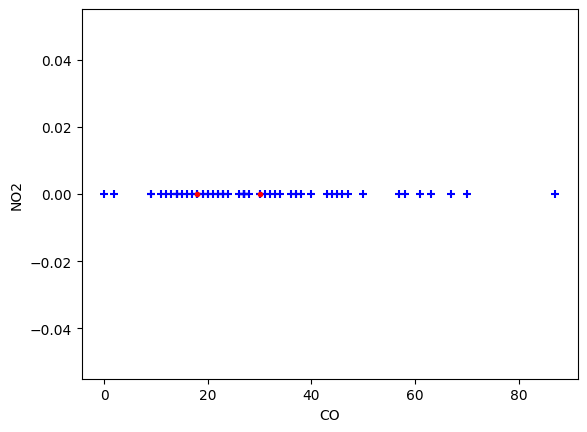

In [86]:
plt.xlabel('CO')
plt.ylabel('NO2')
plt.scatter(zero_class['CO'],zero_class['NO2'], color = 'blue', marker='+')
plt.scatter(one_class['CO'], one_class['NO2'], color = 'red', marker='.')

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('Max',axis=1)).transform(df1.drop('Max',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,PM10,SO2,CO,O3,NO2
0,1.143061,0.967850,1.701914,0.208113,0.0
1,-0.410532,0.967850,1.207156,1.197327,0.0
2,-0.854416,0.967850,0.667420,0.137455,0.0
3,-1.298299,0.967850,2.376584,0.914695,0.0
4,-1.298299,1.957329,0.847332,-1.134391,0.0


In [88]:
x = df_scaled
y = df1['Max']

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.122


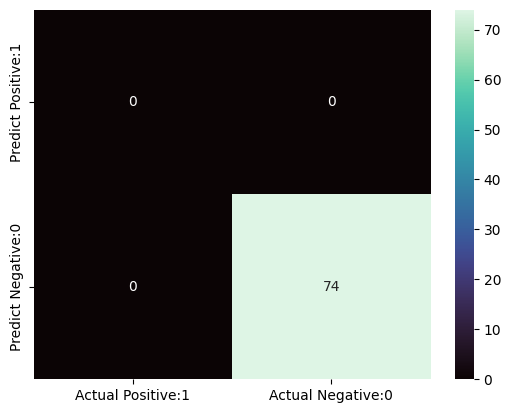

In [90]:
from sklearn.metrics import confusion_matrix

y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (y_pred == 1).astype(int)

cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[1, 0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()


In [91]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         3
          20       0.20      0.75      0.32         4
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         1
          23       0.14      0.67      0.24         3
          24       0.00      0.00      0.00         3
          25       0.00      0.00      0.00         5
          26       0.00      0.00      0.00         0
          27       0.50      0.33      0.40         3
          28       0.08      1.00      0.15         1
          30       0.00    

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

In [92]:
df.shape

(366, 9)

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
df.isnull().sum().any()

np.False_

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM10,366.0,19.699454,9.023704,3.0,14.0,18.5,23.0,60.0
SO2,366.0,1.021858,1.012017,0.0,0.0,1.0,2.0,6.0
CO,366.0,31.161202,22.263521,0.0,18.0,23.5,40.0,164.0
O3,366.0,16.054645,14.172026,0.0,7.0,14.0,22.0,81.0
NO2,366.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Max,366.0,35.800546,21.397890,11.0,21.0,28.0,45.0,164.0


In [96]:
print(df.columns)


Index(['Date', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max', 'Critical Component',
       'Category'],
      dtype='object')


In [97]:
df["Category"].value_counts() 

Category
Good         293
Moderate      67
Unhealthy      6
Name: count, dtype: int64

In [98]:
df["Category"] = df["Category"].map({"Good":0,"Moderate":1,"Unhealthy":3}) 
df

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,1
1,1/2/2020,16,2,58,33,0,58,CO,1
2,1/3/2020,12,2,46,18,0,46,CO,0
3,1/4/2020,8,2,84,29,0,84,CO,1
4,1/5/2020,8,3,50,0,0,50,CO,0
...,...,...,...,...,...,...,...,...,...
361,12/27/2020,12,1,24,0,0,24,CO,0
362,12/28/2020,9,0,16,2,0,16,CO,0
363,12/29/2020,9,0,15,20,0,20,O3,0
364,12/30/2020,6,0,17,10,0,17,CO,0


In [99]:
X = df.drop(['Category'],axis=1)
Y = df['Category']

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [102]:
x_train.shape, x_test.shape

((292, 5), (74, 5))

In [103]:
cols = x_train.columns

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [105]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [106]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [107]:
x_train.describe()


,PM10,SO2,CO,O3,NO2
count,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,292.0
mean,3.497963e-17,-6.083414e-17,-3.041707e-17,-2.433366e-17,0.0
std,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,0.0
min,-1.635306e+00,-9.772027e-01,-1.249156e+00,-1.159861e+00,0.0
25%,-7.366765e-01,-9.772027e-01,-5.907559e-01,-5.978542e-01,0.0
50%,-1.750328e-01,-6.647637e-03,-3.273960e-01,-1.763490e-01,0.0
75%,3.866109e-01,9.639074e-01,3.748970e-01,3.856581e-01,0.0
max,4.430446e+00,4.846128e+00,5.817668e+00,4.530460e+00,0.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import timeit

start = timeit.default_timer()

svc = SVC(kernel='rbf') 
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

stop = timeit.default_timer()

print('Model accuracy score with RBF kernel: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Time: ', stop - start)



Model accuracy score with RBF kernel: 0.1216
Time:  0.049481900001410395


In [ ]:
start = timeit.default_timer()
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(x_train,y_train)
y_pred_test=linear_svc.predict(x_test)

stop = timeit.default_timer()

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Time: ',stop-start)


Model accuracy score with linear kernel and C=1.0 : 0.0946
Time:  0.033070300007238984


In [ ]:
start = timeit.default_timer()
poly_svc=SVC(kernel='poly', C=1.0) 
poly_svc.fit(x_train,y_train)


y_pred=poly_svc.predict(x_test)
stop = timeit.default_timer()


print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Time: ',stop-start)


Model accuracy score with polynomial kernel and C=1.0 : 0.0676
Time:  0.06499789998633787


In [ ]:
import timeit
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

start = timeit.default_timer()
sigmoid_svc = SVC(kernel='sigmoid', C=1.0)

sigmoid_svc.fit(x_train, y_train)

y_pred = sigmoid_svc.predict(x_test)  

stop = timeit.default_timer()

print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Time: ', stop - start)


Model accuracy score with sigmoid kernel and C=1.0 : 0.0541
Time:  0.02867369999876246
